In [1]:
%run ../src/python/helpers.py

%matplotlib inline
from numpy import nan
from pandas import read_feather

data = read_feather("../data/aeolus_top5drugs.feather")

plot_settings()

## How many reports for a number of outcomes?

In [3]:
import ipywidgets as w

In [106]:
d = w.IntSlider(min=1,max=50,step=1,value=10)
d

IntSlider(value=10, max=50, min=1)

In [107]:
from numpy import arange
inds = arange(0,int(d.value),1)

In [108]:
out = 'outcome_concept_name'
series = freqXbyY(data,out,'id').sort_values(ascending=False)
outs = series.index.values[inds]

In [109]:
dat = data.query('{0} in @outs'.format(out))

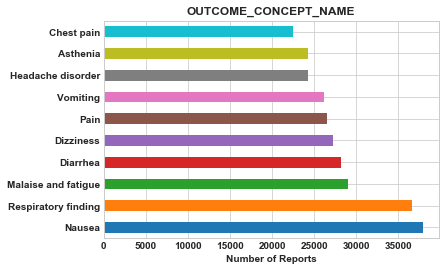

In [110]:
p = plot(series.iloc[inds],kind='barh')
q = p.set_title(p.get_ylabel().upper(),rotation=0,weight='bold')
q = p.set_ylabel("")
q = p.set_xlabel("Number of Reports",weight="bold")

## How many are reported across the years?

In [111]:
series2 = freqXbyY(dat,'report_year',out)

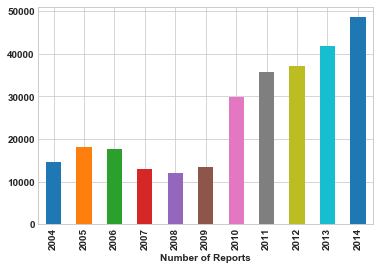

In [112]:
p = plot(series2,kind='bar')
q = p.set_title(p.get_ylabel().upper(),rotation=0,weight='bold')
q = p.set_ylabel(p.get_ylabel(),rotation=0)
q = p.set_xlabel("Number of Reports",weight="bold")

## How many are reported within this class across the sexes?

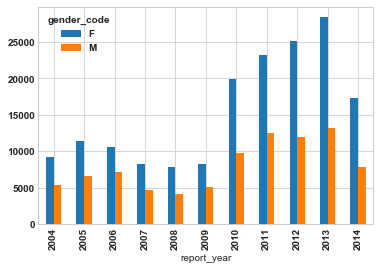

In [113]:
#plot variables for filtering/wrangling
bars = 'gender_code'
x = 'report_year'
count = 'id'
ry = None

#want to filter dataset for M/F gender and if report year was clicked or selected
if ry is None:
    dat = clean_gender(dat)
else:
    dat = clean_gender(dat).query('report_year==@ry')

#main
sub = dat[[bars,x,count]]
plot_sub = sub.groupby([bars,x]).count().reset_index(level=bars).pivot(columns=bars)
plot_sub.columns = plot_sub.columns.droplevel(level=0)
plot_sub.plot.bar()

## How many are reported within this class across ages?

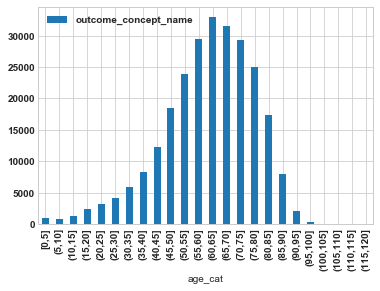

In [114]:
#plot variables for filtering/wrangling
grp = 'age_cat'

#main
dat[[out,grp]].groupby([grp]).count().plot.bar()

## How many are reported within this class across ages for each sex?

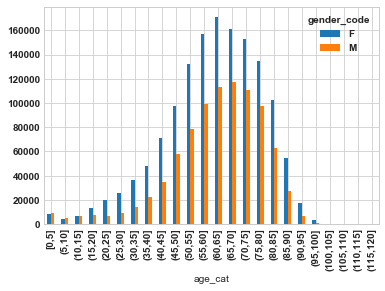

In [115]:
#plot variables for filtering/wrangling
bars = 'gender_code'
x = 'age_cat'
count = 'id'

#want to filter dataset for M/F gender and if report year was clicked or selected
sub = clean_gender(data)[[bars,x,count]]

#main
plot_sub = sub.groupby([bars,x]).count().reset_index(level=bars).pivot(columns=bars)
plot_sub.columns = plot_sub.columns.droplevel(level=0)
plot_sub.plot.bar()